# Wine is bottled poetry

Wine : among all the different "firewaters" and alcoholic beverages, it takes a specific place in the heart and collective imaginary of nations in Europe and abroad.  It is surprising to see how a small bottle made of red, white, or rosé poison can have such a big place in our imagery. If beer is the alcohol of some students' party memories and accompanies some sports fans' best nights, if some spirits belong in our eyes to the hand of some James Bond villains, wine is still arguably the beverage most omnipresent in Western culture and imagination. Wine is seen as the bottle of love, perceived as a drink of prestige, watched with a certain poetry, and regarded as a symbol of culture. It is even seen as part of a national identity, being one of the first word that came to mind when one talk about France.  This alcoholic beverage is impressive in its wide variety in terms of type, taste, and price. From the cheap vino to the expensive Romanée-Conti, from the bubbly Lambrusco to the high-tannin Nebbiolo, wine is accessible for all wallets and to many taste buds. It is mayble partly why the "nectar of God" is the second most consumed alcoholic beverage in the world after beer. 
The proof being that for many our unavowed strategy to choose wine in a grocery aisle is to choose at random by singing "Am, stram, gram, 
Pic et pic et colégram (french version of "eeny, meeny, miny, moe").

What is the difference between red and white wines? What makes a bottle of wine a "great wine"? This document will use a statistical approach to determine what chemical characteristics allow us to answer these two questions. If these scientific results will not be helpfull the next time that one of us go to Carrefour, it still represents a interesting description of the heterogeneity of the biochemicals features of differents wine variety. 

The results of this analytical journey do not aim to provide a general depiction of the distinctive features of the whole population. Indeed, we do not know how the sample was constructed and its original population. However, it will try to see **in this sample** what features differentiate the different types of wines and determine their perceived quality.


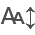

In [43]:
# Setting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import shapiro 
from scipy.stats import normaltest
from scipy.stats import anderson
from scipy.stats import mannwhitneyu
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt

from dash import Dash, html, dash_table, dcc, callback, Output, Input


from itables import init_notebook_mode

init_notebook_mode(all_interactive=True)

# Note : The codes were not added in the main script but kaleido was also used to export the targeted graphs

In [44]:
# determing the path
wines = pd.read_csv("wines.txt", delimiter= ",")

## General information on the dataset

To answer our questions, we will use a dataset composed of ***2 500 ro*ws**, each row being a different bottle of wine. Our dataset include **1*2 variables*** with 
- 10 numerical variables, our explanatory variables;
- 1 qualitative variable, corresponding to the type of wine;
- and our target variable, which is a Boolean variable indicating wheter a wine is considered as "great".

In [45]:
# General information to get an overview  of the dataset
wines.shape 
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         2500 non-null   float64
 1   volatile acidity      2500 non-null   float64
 2   citric acid           2500 non-null   float64
 3   residual sugar        2500 non-null   float64
 4   chlorides             2500 non-null   float64
 5   free sulfur dioxide   2500 non-null   float64
 6   total sulfur dioxide  2500 non-null   float64
 7   density               2500 non-null   float64
 8   pH                    2500 non-null   float64
 9   sulphates             2500 non-null   float64
 10  alcohol               2500 non-null   float64
 11  type                  2500 non-null   object 
 12  great wine            2500 non-null   bool   
dtypes: bool(1), float64(11), object(1)
memory usage: 236.9+ KB


No missing values were detected in the dataset.

In [46]:
#Checking for na
empty_bottle = wines.isna().sum().reset_index()
empty_bottle.columns = ["Variable", "Number of missing values"] # I use this line to add title to my columns
empty_bottle #No missing value

Variable  Number of missing values
0          fixed acidity                         0
1       volatile acidity                         0
2            citric acid                         0
3         residual sugar                         0
4              chlorides                         0
5    free sulfur dioxide                         0
6   total sulfur dioxide                         0
7                density                         0
8                     pH                         0
9              sulphates                         0
10               alcohol                         0
11                  type                         0
12            great wine                         0

## Repartion of the types of wine in the dataset
17% of the dataset (424 entries) correspond to beverages considered as "great wines".

In [47]:
# Frequency tables for great wine
a_table_for_one = pd.crosstab(wines["great wine"], "N")
a_table_for_one ["Percent"] = a_table_for_one["N"]/a_table_for_one["N"].sum()*100 
a_table_for_one ["Percent"] = a_table_for_one ["Percent"].round(0)

a_table_for_one
# Great wine = 17% of the wine in our dataset



col_0          N  Percent
great wine               
False       2076     83.0
True         424     17.0

White wines are predominant in the total of "great wines". As we can see in the table and figure below, if white wines account for 50% of the total wines in our sample, they, however, represent 61% of the bottles of "great wines". 

In [48]:
#  Two way Frequency tables for the type of wine and its quality great wine
a_table_for_two = pd.crosstab(wines["great wine"], wines["type"], margins = True, margins_name="Total") #number of red and white wines is identical
a_table_for_two["% of Red"] = a_table_for_two["Red"]/a_table_for_two["Total"]*100
a_table_for_two["% of Red"] = a_table_for_two["% of Red"].round(1)

a_table_for_two["% of White"] = a_table_for_two["White"]/a_table_for_two["Total"]*100
a_table_for_two["% of White"] = a_table_for_two["% of White"].round(1)

a_table_for_two["Total (%)"] = a_table_for_two["% of White"] + a_table_for_two["% of Red"]
a_table_for_two

# White wines are overrepresented in the total of great wine (61%)

type         Red  White  Total  % of Red  % of White  Total (%)
great wine                                                     
False       1086    990   2076      52.3        47.7      100.0
True         164    260    424      38.7        61.3      100.0
Total       1250   1250   2500      50.0        50.0      100.0

In [49]:
# Visual representation with plotly
# 1) Data of the number of wines by type and quality
data_fig_one = pd.crosstab(wines["great wine"], wines["type"]).reset_index()
data_fig_one = data_fig_one.melt(id_vars= "great wine", var_name="Type", value_name="Count")

# 2) Data that express this number in percent in the sub category of each sub-category of great wines (great wine = 0 / great wine =1)
data_fig_one_percent = pd.crosstab(wines["great wine"], wines["type"], normalize="index").reset_index()
data_fig_one_percent = data_fig_one_percent.melt(id_vars= "great wine", var_name="Type", value_name="Percent") 

data_fig_one = data_fig_one.merge(data_fig_one_percent, on = ["Type", "great wine"]).sort_values(by=["great wine"])
del data_fig_one_percent

data_fig_one["Percent"] = data_fig_one["Percent"] * 100
data_fig_one["Percent"] = data_fig_one["Percent"].round(1)

data_fig_one["Share"] = (data_fig_one["Percent"]).astype(str) + "%"

# Create the bar chart with combined text for Percent and Count
fig_one = px.bar(data_fig_one, x="Percent", y="great wine",color="Type",
                 text=data_fig_one["Share"],
                 title="Figure 1 - Share of Red and White Wines by Wine Quality",
                 labels={"great wine": "Great Wine", "Percent": "Percentage", "Type" : "Type of Wine"},
                 hover_name="Type",
                 hover_data={"Percent" : False, "Share": True, "Count": True, "Type" : False, "great wine" : False}, #Note : As in the website https://plotly.com/python/hover-text-and-formatting/, I use this code to change the tooltip/text that appear when we click on the graph. My goal is to avoid redundancy between share and percent in the hoover and to display the count.
                 color_discrete_map={"Red": "rgb(123,3,35)", "White": "rgb(238, 237, 196)"}, #I add colors that I found on internet that suppose to mimick the wine colors
                 template = "simple_white",
                 height=540,
                 width=1080) #this last line just change the theme of the graph as we can see example in https://plotly.com/python/templates/

fig_one.update_layout(hovermode="x") #line to change the kind of hover used --> I chose this one because it reads simultanously the hovers for the two type of wines.
fig_one.update_layout(title_x=0.5) #line to center the title
fig_one.show()

#To export the graph the code fig_one.write_image("Exported Graphs Library/fig1.png",scale = 12)  

In [50]:
alt_figure_one = px.histogram(data_fig_one, x="great wine", y="Count", color ="Type", barmode="group",
                              text_auto=True,
                              title="Figure 1b - Count of Great Wines by kind of wine",
                              labels={"great wine": "Great Wine", "sum of count": "Count", "Type" : "Type of Wine"},
                              color_discrete_map={"Red": "rgb(123,3,35)", "White": "rgb(238, 237, 196)"},
                              template = "simple_white",
                              height=540,
                              width=1080)
alt_figure_one.update_layout(title_x=0.5)
alt_figure_one.show()

Moreover, the share of great wines is higher in the total of white wines (21% of white wines) than in the total of red wines (13%). 

In [51]:
# Addition of percentage for row true and false of great wine
a_table_for_two_v2 = a_table_for_two[["Red","White","Total"]].transpose()

a_table_for_two_v2.rename({"False" : "0", "True" : "1"}, inplace = True)

a_table_for_two_v2.columns # We had several errors regarding the next code when we used ["False"] and ["True"] as column names. By printing the column names we realised that python wanted us to write these 2 columns without quotation marks

a_table_for_two_v2["% of False"] = a_table_for_two_v2[False]/a_table_for_two_v2["Total"]*100
a_table_for_two_v2["% of False"] = a_table_for_two_v2["% of False"].round(1)
a_table_for_two_v2["% of True"] = a_table_for_two_v2[True]/a_table_for_two_v2["Total"]*100
a_table_for_two_v2["% of True"] = a_table_for_two_v2["% of True"].round(1)

a_table_for_two_v2["% of Total"] = a_table_for_two_v2["% of False"] + a_table_for_two_v2["% of True"]
a_table_for_two_v2 = a_table_for_two_v2[["% of True", "% of False", "% of Total"]]

a_table_for_two_v2


# Paralelly, the share  of great wines is superior in the total of white wines (21% of white wines in our dataset) than in red wines.

great wine  % of True  % of False  % of Total
type                                         
Red              13.1        86.9       100.0
White            20.8        79.2       100.0
Total            17.0        83.0       100.0

However, any interpretation of these descriptive statistics should be made with prudence. We do not know if this share is due to the nature of white wine itself or merely due to how the dataset was constructed.

## Biochemical features of wine

### A general overview
Before diving into our exploration of what makes a wine "great," it is important to understand how the inherent features of our different wines are distributed in our dataset. 

The table below describes the main statistics of our numeric variables. This descriptive table gives us at least two important pieces of information. 

First, it allows us to have a first overview of the coherence of the data. Wine production is governed by the respect of several norms and laws. If these rules vary between countries, it would be suspicious to have values that are far from the majority of the said rules. Several values in our dataset align with European rules regarding wine production. For example, the maximum level of citric acid in our dataset corresponds to the regulation of a maximum of 1 g/l (1g/dm3) in the EU (randoxfood.com, 2019). .


In [52]:

short_summary = wines.describe(percentiles = []) #I drop the other percentiles to make the reading easier for me

# Addition of cv : I wanted to see what variables had the biggest volatility regardless of the scale and decide to add the coefficent of variation to my summary

short_summary = short_summary.transpose()  # I invert row and columns to facilitate the computation. My differents statistics became therefore different columns.
short_summary["cv (in %)"] = short_summary["std"]/short_summary["mean"]*100
short_summary["cv (in %)"] = short_summary["cv (in %)"].round(0)
short_summary = short_summary[["min", "mean", "50%", "max", "std", "cv (in %)"]].sort_values(by=["cv (in %)"], ascending = False) #Reordering of the columns and drop of count
short_summary
# Density data seem pretty homogeneous and PH has a relatively lower coefficient of variation and std than the other features. What can be explained by the fact that most of the wines are bounded in a specific PH interval.
# The variations are the most important in residuals sugars, both sulfur dioxyd compoment and chlorid, citric acid and acid volatility




min       mean        50%        max        std  \
residual sugar        0.7000   4.220000   2.400000   23.50000   3.839540   
free sulfur dioxide   1.0000  25.452200  23.000000  289.00000  17.717002   
chlorides             0.0090   0.066762   0.059000    0.61100   0.043076   
total sulfur dioxide  6.0000  92.711000  90.000000  440.00000  60.239227   
citric acid           0.0000   0.302384   0.300000    1.00000   0.166705   
volatile acidity      0.1000   0.407888   0.360000    1.58000   0.193440   
sulphates             0.2500   0.572580   0.550000    2.00000   0.167606   
fixed acidity         4.2000   7.574620   7.200000   15.60000   1.555536   
alcohol               8.0000  10.501129  10.300000   14.00000   1.150068   
pH                    2.7400   3.255064   3.250000    4.01000   0.164223   
density               0.9874   0.995263   0.995625    1.00369   0.002775   

                      cv (in %)  
residual sugar             91.0  
free sulfur dioxide        70.0  
chlorides                  65.0  
total sulfur dioxide       65.0  
citric acid                55.0  
volatile acidity           47.0  
sulphates                  29.0  
fixed acidity              21.0  
alcohol                    11.0  
pH                          5.0  
density                     0.0

Sulfur dioxide (SO₂) levels are in 99% of cases below the EU norm of 400 mg/l, and pH levels are (except for one exception) below 4, the recommended level to make the wine biologically stable (winemak-in.com, 2017). The few values that are above the recommended threshold are either really close to the limit (pH) or coherent with norms in other non-EU countries (SO₂; cf. OIV, 2021, page 7).

Secondly, one can observe that the amount of variation changes widely between the different components. Density and pH have relatively homogenous (cv of 0.3% and 5%), while residual sugar (91%), SO₂ (65%), chlorides (65%), and citric acid (55%) show important variations.

A last complementary remark can be written on the heterogeneity of chloride levels. Chloride levels tend to vary regarding the geographical locations and the grape variety used to produce a bottle of wine (Coli et al., 2015). These important variations and the gap between the two extremes make plausible that the bottle came from different areas and probably different countries (e.g. in Coli et al.'s paper, chloride levels above 0.4 were common in their sample for countries like Australia, while France tends to have chloride levels below 0.2).

In [53]:
ph_above_four = wines[ wines["pH"] >= 4]
ph_above_four = pd.crosstab(ph_above_four["pH"], "N").reset_index()
ph_above_four

col_0    pH  N
0      4.01  2

In [54]:
sulfure_above_eu_law = wines[ wines["total sulfur dioxide"] >= 400]
sulfure_above_eu_law = pd.crosstab(sulfure_above_eu_law["total sulfur dioxide"], "N").reset_index()
sulfure_above_eu_law

col_0  total sulfur dioxide  N
0                     440.0  1

### Type of wine and underlying characteristics

One of our main questions was to understand which characteristics differs between red and white wines. The first objective is to have a general idea of the variables' distribution from a type of wine to another. Furthermore, these results can be helpful to determine in the next section what approach can be used to understand the inherent characteristic of a "great wine". 

We start finding the average of each characteristic to see if the range for each variable to type of wine and if there are big differences in values that make a wine great.  


In [55]:
## trying to see average range for each variable to type of wine and if there are big differences in values that make a great wine  
each_wine_avg = wines.groupby(["type", "great wine"]).aggregate(
       alcohol = ("alcohol", "mean"),
       sulphates = ("sulphates", "mean"),
       pH = ("pH", "mean"),
       free_sulfur_dioxide = ("free sulfur dioxide", "mean"),
       volatile_acidity = ("volatile acidity", "mean"),
       residual_sugar = ("residual sugar", "mean"),
       fixed_acidity = ("fixed acidity", "mean"),
       total_sulfur_dioxide = ("total sulfur dioxide", "mean"),
       citric_acid = ("citric acid", "mean"),
       density = ("density", "mean"),
       chlorides = ("chlorides", "mean")  
    ).T

each_wine_avg.to_csv('Exported Graphs Library/each_wine_average.csv', header=True, index=True, encoding='utf-8')

#### Descriptive statistics
Then, we explore graphically the distribution of our variables. During this analysis, the different biochemical components seem to vary strongly from one kind of wine to another. For example, as we can see in the following figure, white wines tend to have more residual sugars than their red counterparts. The median level of residual sugar in white wines is indeed twice the one for red. 

In [56]:
# Graphical representation of Residual Sugar by type of wine

box_plot_sugar = px.box(wines, x ="residual sugar", color="type", y = "type", # the use color = "type" in addition of y ="type" allow us to use or selected colors for the boxplot by type of white
                       title="Figure 2 - Distribution of the residual sugar by type of wine",
                        labels={"type" : "Type of Wine", "residual sugar" : "Residual Sugar"},
                        hover_name="type",
                        color_discrete_map={"Red": "rgb(123,3,35)", "White": "rgb(238, 237, 196)"}, 
                        template = "simple_white")

box_plot_sugar.update_layout(height=540, width = 1080)
box_plot_sugar.update_layout(title_x=0.5)
box_plot_sugar.update_layout(showlegend=False) #I hided the legend/label because the same info can be seen in the y axis
box_plot_sugar.show()

#Code to export the graph : box_plot_sugar.write_image("Exported Graphs Library/Figure 2 - Distribution of the residual sugar by type of wine.png",scale = 12)

More than all, there is far more variation in residual sugar levels in white wines. The difference between the first and third quartile for white wines is 6 times the red wines one, and its coefficient of variation is higher by 25 points.

In [57]:
sugar_mean_cv = wines.groupby("type")["residual sugar"].agg(["mean", "std"])
sugar_mean_cv["CV"] = sugar_mean_cv["std"]/sugar_mean_cv["mean"]*100
sugar_mean_cv[["CV", "mean", "std"]] = sugar_mean_cv[["CV", "mean", "std"]].round(0)
sugar_mean_cv

mean  std    CV
type                  
Red     3.0  1.0  54.0
White   6.0  5.0  79.0

Differences can be observe in total and free SO₂ levels with white wines having in general higher level and standard deviation. However, it is interesting to see that in term of coefficient of variation, i.e. standard error normalized by the mean, red wines have higher values.

In [58]:
# Graphical representation of Sulfur dioxide by type of wine


box_plot_S02_ttl = px.box(wines, x ="total sulfur dioxide", color="type", y = "type", 
                       title="Figure 3 - Distribution of the total sulfur dioxide",
                        labels={"type" : "Type of Wine", "total sulfur dioxide" : "Total SO2"},
                        hover_name="type",
                        color_discrete_map={"Red": "rgb(123,3,35)", "White": "rgb(238, 237, 196)"}, 
                        template = "simple_white")

box_plot_S02_ttl.update_layout(height=540, width = 1080)
box_plot_S02_ttl.update_layout(title_x=0.5)

box_plot_S02_ttl.update_layout(showlegend=False) 
box_plot_S02_ttl.show() 

#White wine tend to have in general higher level of Total SO2

SO2_mean_cv = wines.groupby("type")["total sulfur dioxide"].agg(["mean", "std"])
SO2_mean_cv["CV"] = SO2_mean_cv["std"]/SO2_mean_cv["mean"]*100
SO2_mean_cv[["CV", "mean", "std"]] = SO2_mean_cv[["CV", "mean", "std"]].round(0)
SO2_mean_cv
#The variation (std) is also more important for white wines.

mean   std    CV
type                    
Red     47.0  33.0  71.0
White  139.0  43.0  31.0

In [59]:
# Graphical representation of free Sulfur dixoide by type of wine


box_plot_S02_free = px.box(wines, x ="free sulfur dioxide", color="type", y = "type", 
                           title="Figure 4 - Distribution of the free sulfur dioxide",
                           labels={"type" : "Type of Wine", "free sulfur dioxide" : "Free SO2"},
                           hover_name="type",
                           color_discrete_map={"Red": "rgb(123,3,35)", "White": "rgb(238, 237, 196)"},  template = "simple_white")

box_plot_S02_free.update_layout(height=540, width = 1080)
box_plot_S02_free.update_layout(title_x=0.5)

box_plot_S02_free.update_layout(showlegend=False) 
box_plot_S02_free.show() 



SO2_free_mean_cv = wines.groupby("type")["free sulfur dioxide"].agg(["mean", "std"])
SO2_free_mean_cv["CV"] = SO2_mean_cv["std"]/SO2_mean_cv["mean"]*100
SO2_free_mean_cv[["CV", "mean", "std"]] = SO2_free_mean_cv[["CV", "mean", "std"]].round(0)
SO2_free_mean_cv
#Similar analysis for the free sulfur dioxide

mean   std    CV
type                   
Red    16.0  10.0  70.0
White  35.0  18.0  31.0

For some variables, it is not only the centre of the distribution but also its general shape which is different from the two types of wines. It is notably true for citric acid. In the figure below, we can see the distribution of citric acid for red and white wines.  If the two distribution seem to be relatively similar between 0.26 g/l and 0.47 g/l, red wines has a significantly stronger concentration in low values of citric acid and as a pic around the interval 0,48-0,49. This peculiar distribution is partly explained by the fact that, at the opposite of white wines, it is common for several red wines not to have citric acid. Citric acidity is added artificially to the wine sometimes as a stabilizer to prevent ferric hazes or to combat some strains of bacteria. However, when used for gustative reason, it is mainly to balance dry white wines. 

In [60]:
hist_citric_acid = px.histogram(wines, x="citric acid", color="type", marginal="box",
                   title="Figure 5 - Histogram : Distribution of citric acid level by type of wine",
                   labels={"type" : "Type of Wine", "citric acid" : "Citric Acid"},
                   color_discrete_map={"Red": "rgb(123,3,35)", "White": "rgb(238, 237, 196)"}, 
                    opacity=0.6,
                    category_orders={"type": ["Red", "White"]}, #We use it to change the order of the histogram in the layout like in https://plotly.com/python/styling-plotly-express/ because the red bars tend to hide their counterparts.
                   template = "simple_white")
hist_citric_acid.update_layout(height=540)
hist_citric_acid.update_layout(title_x=0.5)
hist_citric_acid.update_layout(barmode='overlay')
hist_citric_acid.show()

Seemingly, differences in the distribution are also observed in other variables such as volatile acidity level but also with the SO2 variables and the density.

In [61]:
#This code takes inspiration from https://dash.plotly.com/tutorial (notably to the section "My First App with Data, Graph, and Controls")
#And to the section "Combined statistical representations in Dash" from https://plotly.com/python/distplot/#combined-statistical-representations-in-dash

numeric_values = wines.columns.drop(["type", "great wine"]) 

app = Dash(__name__)

app.layout = [html.Div([
    html.H3("Figure 6 - Interactive histogram of the variables by type of wine"),
    html.P("Select your variable of interest :"),
    dcc.RadioItems(options=numeric_values,
        value="volatile acidity",
        inline=True,
        id="button_for_variable")]),

    html.Div(children=[dcc.Graph(figure={}, id='histo-chart-final')])]

@callback(
        Output(component_id='histo-chart-final', component_property='figure'),
        Input(component_id="button_for_variable", component_property='value'))

def update_graph(variable_of_interest):
    fig = px.histogram(wines, x=variable_of_interest, color="type",
                    title= "Distribution of " + variable_of_interest,
                   labels={"type" : "Type of Wine"},
                   color_discrete_map={"Red": "rgb(123,3,35)", "White": "rgb(238, 237, 196)"}, 
                    opacity=0.6,
                    category_orders={"type": ["Red", "White"]}, 
                   template = "simple_white")
    fig.update_layout(barmode='overlay')

    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True, port=2223) # This option with port is optional. I used it because the code did not run on my pc because another dash that I tried seem to use the same default port.

              


Descriptive statistics on the two samples seem to indicate important differences in the mean of our two subsamples. The table below gives, for each variable, its mean and standard deviation (column "Statistics") for red and white wines. It also computes the difference between the two means and the difference in percent. The latter is equal to the difference (Mean of red wines - Mean of white wines) divided by the mean of white wines. This measure was created to facilitate the comparison between the different variables by eliminating the scale differences in their measurements. Important gap seem to exist for the two subsample. Moreover, the form of this gap seem to be heterogeneous in term of magnitude and of the sign of these differece among variables.

In [62]:
# A comparaison between the main characteristics of the types of wine
numeric_values = wines.columns.drop(["type", "great wine"]) 
a_bottle_ticket = wines.groupby("type")[numeric_values].agg(["mean", "std"]).transpose().reset_index()
a_bottle_ticket["Difference in percent"] = (a_bottle_ticket["Red"] - a_bottle_ticket["White"]) / a_bottle_ticket["White"]*100#this column is used to look at which variables know potentially the biggest gap. 
a_bottle_ticket["Difference (raw value)"] = a_bottle_ticket["Red"] - a_bottle_ticket["White"]
a_bottle_ticket["Difference in percent"] = a_bottle_ticket["Difference in percent"].round(1)
a_bottle_ticket["Difference (raw value)"] = a_bottle_ticket["Difference (raw value)"].round(1) 
a_bottle_ticket = a_bottle_ticket.sort_values(by="Difference in percent")
a_bottle_ticket.columns =  ["Variable", "Statistics", "Red", "White", "Difference in percent", "Difference (raw value)"] # I use it artinatively to rename() that seem not to work for the column generate automatically by pandas (level_0 and level_1)
a_bottle_ticket = a_bottle_ticket.sort_values(by = ["Statistics", "Difference in percent"])
a_bottle_ticket
#In average red wine seem to have more chlorides volatile acidity than white wines while the latter tend to be sweeter (have more residual sugar) and have more sulfur dioxide.


Variable Statistics        Red       White  \
12  total sulfur dioxide       mean  46.505200  138.916800   
6         residual sugar       mean   2.535840    5.904160   
10   free sulfur dioxide       mean  15.821600   35.082800   
4            citric acid       mean   0.271344    0.333424   
20               alcohol       mean  10.424747   10.577512   
14               density       mean   0.996726    0.993801   
16                    pH       mean   3.310656    3.199472   
0          fixed acidity       mean   8.300640    6.848600   
18             sulphates       mean   0.657456    0.487704   
2       volatile acidity       mean   0.530932    0.284844   
8              chlorides       mean   0.087600    0.045925   
7         residual sugar        std   1.371302    4.683817   
11   free sulfur dioxide        std  10.410287   18.276109   
15               density        std   0.001859    0.002770   
13  total sulfur dioxide        std  33.105470   43.486682   
21               alcohol        std   1.074939    1.216223   
17                    pH        std   0.154540    0.154569   
19             sulphates        std   0.170015    0.113498   
5            citric acid        std   0.195786    0.123867   
3       volatile acidity        std   0.183590    0.104205   
1          fixed acidity        std   1.721605    0.906833   
9              chlorides        std   0.048383    0.022417   

    Difference in percent  Difference (raw value)  
12                  -66.5                   -92.4  
6                   -57.0                    -3.4  
10                  -54.9                   -19.3  
4                   -18.6                    -0.1  
20                   -1.4                    -0.2  
14                    0.3                     0.0  
16                    3.5                     0.1  
0                    21.2                     1.5  
18                   34.8                     0.2  
2                    86.4                     0.2  
8                    90.7                     0.0  
7                   -70.7                    -3.3  
11                  -43.0                    -7.9  
15                  -32.9                    -0.0  
13                  -23.9                   -10.4  
21                  -11.6                    -0.1  
17                   -0.0                    -0.0  
19                   49.8                     0.1  
5                    58.1                     0.1  
3                    76.2                     0.1  
1                    89.8                     0.8  
9                   115.8                     0.0

#### Statistical tests

We wanted to conduct a statistical test to see whether differences in mean for each variable was statistically significant. As a first step, we conduct a normal test in order to decide whether our main test should be a parametric or, by precaution, a non-parametric one. Our choice took roots in the fact that, in a study of 2015 on difference in wines' chloride level, Coli et al. found that their data on chloride for example was characterized by :
- large standard deviation
- asymmetry
- outliers
- and a non-normal distribution.

We therefore conduct on each variable and for all types of wines 2 tests : the Anderson test and the Shapiro one. 
The results for the red wines subsample is below : 

In [63]:
#The previous value are only descriptive statistics. We will try to see if the values are significatively different.
# Step 1 - normality test (this section is inspired by https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/)



red_wines = wines[wines["type"] == "Red"].drop("type", axis = 1)
white_wines = wines[wines["type"] == "White"].drop("type", axis = 1)





def shapiro_test(column):
    return shapiro(column)



def intepretation_shapiro(pvalue):
    if pvalue  >=0.05:
        return "Normal (can not reject H0)"
    else:
        return "Reject H0"

shapiro_test_red = red_wines.drop("great wine", axis = 1)
shapiro_test_red = pd.DataFrame(shapiro_test_red.apply(shapiro_test)).transpose()
shapiro_test_red.columns = ["Shapiro Statistics", "Shapiro p-value"]
    
shapiro_test_red["Shapiro Interpretation"] = shapiro_test_red["Shapiro p-value"].apply(intepretation_shapiro)
shapiro_test_red = shapiro_test_red.reset_index()

def anderson_test(column):
    return normaltest(column)



def intepretation_anderson(pvalue):
    if pvalue  >=0.05:
        return "Normal (can not reject H0)"
    else:
        return "Reject H0"

anderson_test_red = red_wines.drop("great wine", axis = 1)
anderson_test_red = pd.DataFrame(anderson_test_red.apply(anderson_test)).transpose()
anderson_test_red.columns = ["Anderson Statistics", "Anderson p-value"]
    
anderson_test_red["Anderson Interpretation"] = anderson_test_red["Anderson p-value"].apply(intepretation_anderson)

anderson_test_red = anderson_test_red.reset_index()


normal_tests_red = shapiro_test_red.merge(anderson_test_red, on = "index")
del anderson_test_red
del shapiro_test_red

normal_tests_red_to_print = normal_tests_red.drop(["Shapiro Statistics", "Anderson Statistics"], axis = 1)
normal_tests_red_to_print





index  Shapiro p-value Shapiro Interpretation  \
0          fixed acidity     1.105646e-20              Reject H0   
1       volatile acidity     1.530893e-15              Reject H0   
2            citric acid     3.699606e-19              Reject H0   
3         residual sugar     8.643745e-48              Reject H0   
4              chlorides     5.463288e-51              Reject H0   
5    free sulfur dioxide     2.286207e-27              Reject H0   
6   total sulfur dioxide     5.514778e-31              Reject H0   
7                density     7.227174e-06              Reject H0   
8                     pH     1.032785e-05              Reject H0   
9              sulphates     7.761063e-35              Reject H0   
10               alcohol     3.525005e-24              Reject H0   

    Anderson p-value Anderson Interpretation  
0       7.531595e-33               Reject H0  
1       3.988738e-29               Reject H0  
2       3.467097e-25               Reject H0  
3      1.697342e-262               Reject H0  
4      8.271139e-307               Reject H0  
5       1.027581e-57               Reject H0  
6       8.014148e-91               Reject H0  
7       5.275462e-05               Reject H0  
8       1.065142e-07               Reject H0  
9      3.658033e-159               Reject H0  
10      1.197601e-24               Reject H0

The results on the white wine subsample is similar.

In [64]:
# Step 1b- Normality test for white wine subsample
shapiro_test_white = white_wines.drop("great wine", axis = 1)
shapiro_test_white = pd.DataFrame(shapiro_test_white.apply(shapiro_test)).transpose()
shapiro_test_white.columns = ["Shapiro Statistics", "Shapiro p-value"]
    
shapiro_test_white["Shapiro Interpretation"] = shapiro_test_white["Shapiro p-value"].apply(intepretation_shapiro)
shapiro_test_white = shapiro_test_white.reset_index()

anderson_test_white = white_wines.drop("great wine", axis = 1)
anderson_test_white = pd.DataFrame(anderson_test_white.apply(anderson_test)).transpose()
anderson_test_white.columns = ["Anderson Statistics", "Anderson p-value"]
    
anderson_test_white["Anderson Interpretation"] = anderson_test_white["Anderson p-value"].apply(intepretation_anderson)

anderson_test_white = anderson_test_white.reset_index()


normal_tests_white = shapiro_test_white.merge(anderson_test_white, on = "index")
del anderson_test_white
del shapiro_test_white

normal_tests_white_to_print = normal_tests_red.drop(["Shapiro Statistics", "Anderson Statistics"], axis = 1)
normal_tests_white_to_print

# Both the red wines' and white wines' subsamples seem to have variables that does not follow normal distriubtion. We will therefore use non parametric tests.

index  Shapiro p-value Shapiro Interpretation  \
0          fixed acidity     1.105646e-20              Reject H0   
1       volatile acidity     1.530893e-15              Reject H0   
2            citric acid     3.699606e-19              Reject H0   
3         residual sugar     8.643745e-48              Reject H0   
4              chlorides     5.463288e-51              Reject H0   
5    free sulfur dioxide     2.286207e-27              Reject H0   
6   total sulfur dioxide     5.514778e-31              Reject H0   
7                density     7.227174e-06              Reject H0   
8                     pH     1.032785e-05              Reject H0   
9              sulphates     7.761063e-35              Reject H0   
10               alcohol     3.525005e-24              Reject H0   

    Anderson p-value Anderson Interpretation  
0       7.531595e-33               Reject H0  
1       3.988738e-29               Reject H0  
2       3.467097e-25               Reject H0  
3      1.697342e-262               Reject H0  
4      8.271139e-307               Reject H0  
5       1.027581e-57               Reject H0  
6       8.014148e-91               Reject H0  
7       5.275462e-05               Reject H0  
8       1.065142e-07               Reject H0  
9      3.658033e-159               Reject H0  
10      1.197601e-24               Reject H0

Because of these results, we use a non-parametric Mann and Whitney U test to appraise the significance of the difference in means between the two kinds of wines.

In [65]:
#Step 2 - Use Mann and Whitney U test : This test will be use to see whether the features between red and white wines are statistically different. 
# The code take inspiration from : https://www.geeksforgeeks.org/mann-and-whitney-u-test/
for variable in numeric_values :
    stat, p_value = mannwhitneyu(red_wines[variable], white_wines[variable], alternative="two-sided")
    print("   - " + variable.title() + " : p-value = %.2f" % (p_value)) #.title() is used for formatting reasons. I use it to transform the first letters of each word in majuscule
# The distribution is statiscally different between our two populations (red and white wines).

   - Fixed Acidity : p-value = 0.00
   - Volatile Acidity : p-value = 0.00
   - Citric Acid : p-value = 0.00
   - Residual Sugar : p-value = 0.00
   - Chlorides : p-value = 0.00
   - Free Sulfur Dioxide : p-value = 0.00
   - Total Sulfur Dioxide : p-value = 0.00
   - Density : p-value = 0.00
   - Ph : p-value = 0.00
   - Sulphates : p-value = 0.00
   - Alcohol : p-value = 0.01


Statistical differences are found for all numeric variables. 

The graph below gave us the mean for our two subpopulation.

In [ ]:
stats_for_scatter_plot = a_bottle_ticket[a_bottle_ticket["Statistics"] == "mean"].drop("Statistics", axis =1)
stats_for_scatter_plot = stats_for_scatter_plot.melt(["Variable", "Difference (raw value)", "Difference in percent"], var_name = "type", value_name = "Mean")

stats_for_scatter_plot = px.scatter(stats_for_scatter_plot, x="Mean", y="Variable", color="type",
                   title="Figure 7 - Mean of the variables by type of wine",
                   labels={"type" : "Type of Wine"},
                   hover_name="type",
                  hover_data={"Variable" : True, "Mean": True, "type" : False},
                   color_discrete_map={"Red": "rgb(123,3,35)", "White": "rgb(238, 237, 196)"},
                  template = "none") #here we change the template to keep a white background but display the background's lines for aestetich value
stats_for_scatter_plot.update_layout(height=480)
stats_for_scatter_plot.update_layout(title_x=0.5)

stats_for_scatter_plot.show()

To summarize our findings, the following graph displays the difference in percent between the two means.

In [67]:
def interpretation_difference(difference):
    if difference  >=0:
        return "Red Wine has a higher mean"
    else:
        return "White wine has a higher mean"

lets_go_to_the_bar = a_bottle_ticket
lets_go_to_the_bar["Interpretation of difference"] = lets_go_to_the_bar["Difference (raw value)"].apply(interpretation_difference) #as a reminder, this table contains the mean of red and whites wine for each variable, their difference and their difference in percent.

lets_go_to_the_bar = px.bar(lets_go_to_the_bar[lets_go_to_the_bar["Statistics"] == "mean"], x="Difference in percent", y="Variable", color = "Interpretation of difference", 
                   title="Figure 8 - Difference in percent by type of wine",
                    text="Difference in percent",
                   color_discrete_map={"Red Wine has a higher mean": "rgb(123,3,35)", "White wine has a higher mean": "rgb(238, 237, 196)"},
                  template = "none")
lets_go_to_the_bar.update_layout(height=540)
lets_go_to_the_bar.update_layout(title_x=0.5)

lets_go_to_the_bar.show()

#Export lets_go_to_the_bar.write_image("Exported Graphs Library/Difference in percent by type of wine.png",scale = 12)

To summarize, red whines tend to have in average higher chloride, volatile acidity, sulphates, total acidity and pH level. White wines tend at the opposite to have an higher mean in term of alchohol, reisidual sugar, SO₂ and citric acid.
We should note that because of the variety of wines in each subset, the describe relationship describe between the two big type of wines can not be true from a couple of bottle to another. It exists between 6 000 and 15 000 wine grape varieties. Thus, some kind of red wine can have a higher residual sugar than some variety of white wines and the opposite can be true for cholrides level. It is even more true than insite each type of wine, there is a variety of subtypes.

However, these result gave us a general overview of the general differences between the two type of wine. 

## Analysis of the corelation between variables

In the previous section, we studied together the general distribution of our different variables. This part of the report will focus of the relationship that exists between our variables. Taking into account the significance of the differences that exist in the subsample (red and white wines). We decided to study this relationship independently for the two subpopulations and not the whole dataset. The figure below is the correlation matrices of all variables (numeric and qualitative) for the two different kinds of wine. Some correlations arise from the nature of the data. For example, total SO₂  and free SO₂   are strongly correlated, as total SO₂  is the sum of free and bound SO₂. However, it is interesting to note that the magnitude and, sometimes, the sign of some "natural" correlations shifts between red and white wines. For instance, red wines exhibit positive correlations between sulphates and fixed acidity while the opposite is true for white wines. An inverse relationship also exists for the two type of wines regarding pH and volatile acidity.

Even when the sign is the same, the most significant correlation coefficient differs between the two wines. For red wines, the highest correlations are found between:

- Density and fixed acidity (positive),
- Citric acid and volatile acidity (negative),
- Citric acid and pH (negative).

For white wines, the strongest correlations are:
- Residual sugar and density, with a high correlation coefficient (+80%),
- total SO₂ and density (positive),
- pH and fixed acidity (negative),
- Alcohol and total SO₂ (negative).

Both types of wine also show a strong correlation between alcohol and density, though this is stronger for white wines (-79%) than for red wines (-50%).

In [68]:
# The codes of this section are inspired by :
# https://plot.ly/python/subplots/, 
# https://plotly.com/python/imshow/, 
# https://community.plotly.com/t/combining-ready-made-figures-into-one-with-separation-by-color/72711/10,
# and https://plotly.com/python/colorscales/.

hot_wine_hot_map_Red = px.imshow((wines[wines["type"] == "Red"].corr(numeric_only=True)*100).round(0),
                                 color_continuous_scale="RdBu_r",
                                text_auto = True)

hot_wine_hot_map_White = px.imshow((wines[wines["type"] == "White"].corr(numeric_only=True)*100).round(0),
                                 color_continuous_scale="RdBu_r",
                                text_auto = True)


hot_wine_hot_map_v2 = make_subplots(rows = 1, cols = 2, subplot_titles=("Red Wines", "White Wines"))


hot_wine_hot_map_v2.add_trace(hot_wine_hot_map_Red['data'][0],1,1)
hot_wine_hot_map_v2.add_trace(hot_wine_hot_map_White['data'][0],1,2)

hot_wine_hot_map_v2.update_layout(height=540, width=1000, 
                                  title_text="Figure 9 - Correlation matrices by type of wine",
                                  coloraxis=dict(colorscale='RdBu_r', cmid=0))

hot_wine_hot_map_v2.update_yaxes(side= "right", row=1, col=2) #this line of code just put the y axis on the left, the code below hide the colorscale/legend. These 2 options are used to make the coefficient matrix more readable (some information overlapped if these options are not added)
hot_wine_hot_map_v2.update_coloraxes(showscale=False)
hot_wine_hot_map_v2.show()

# hot_wine_hot_map_v2.write_image("Exported Graphs Library/Correlation matrices by type of wine.png",scale = 12)

Following the result from correlation matrix, we also build graphs to study the strongest relations we found. Because a code for all the characteristics generate a big result, we chose to select some of them, namely - density, alcohol, fixed acidity, and residual sugar.

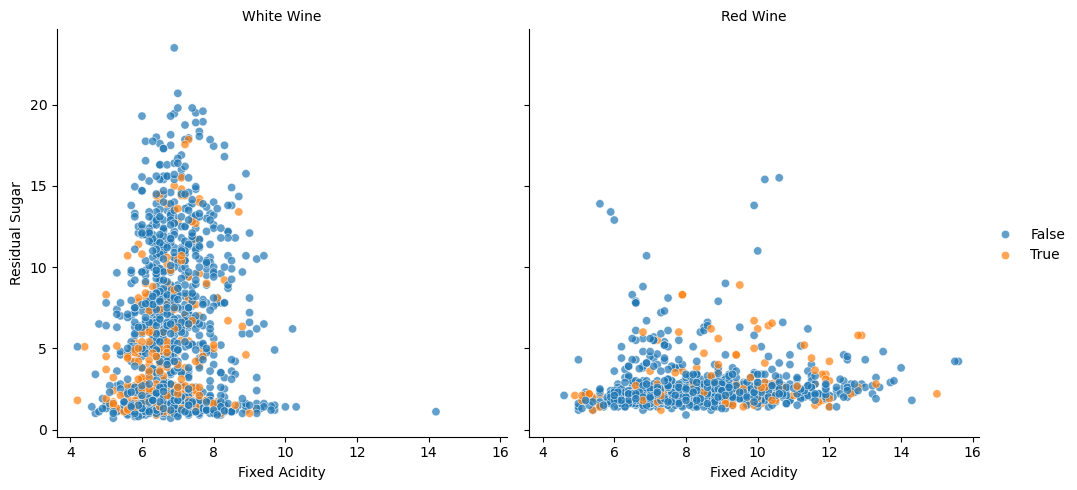

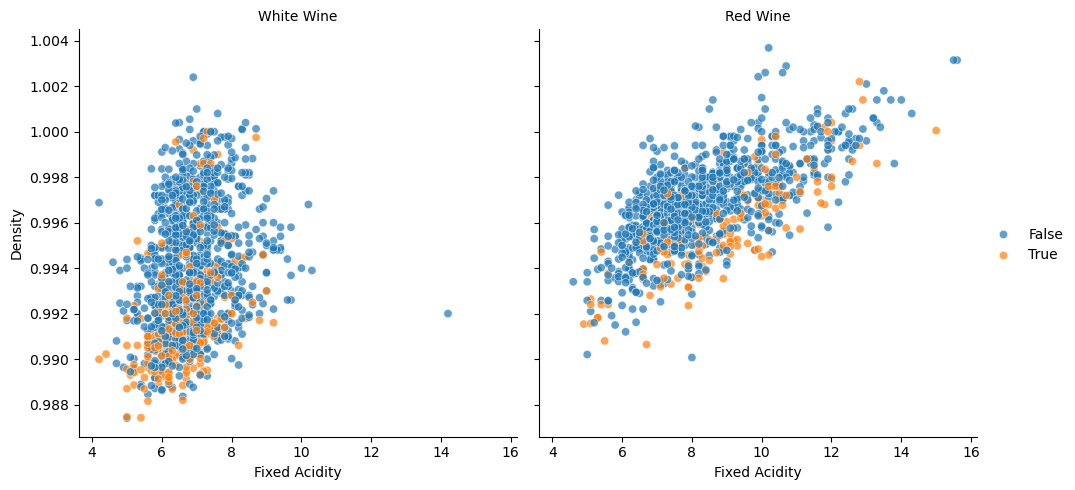

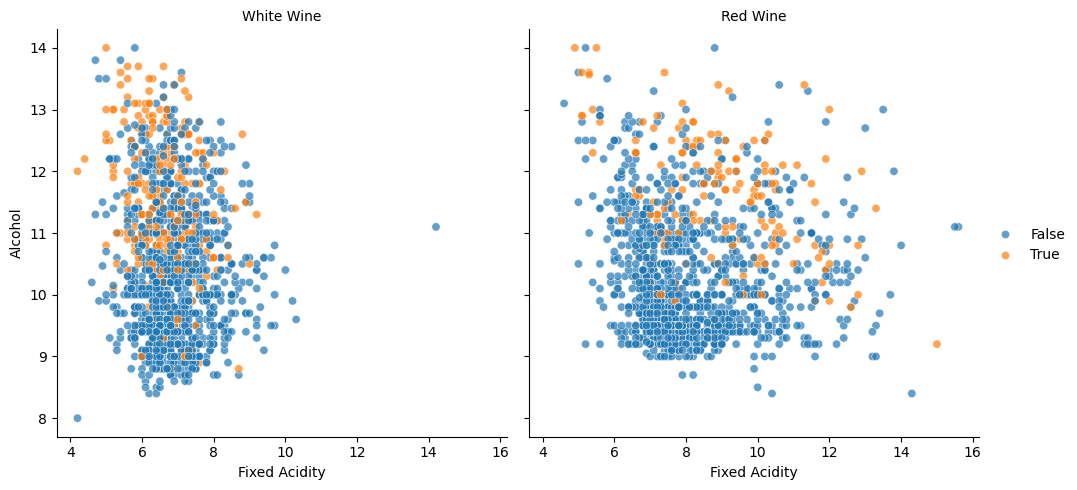

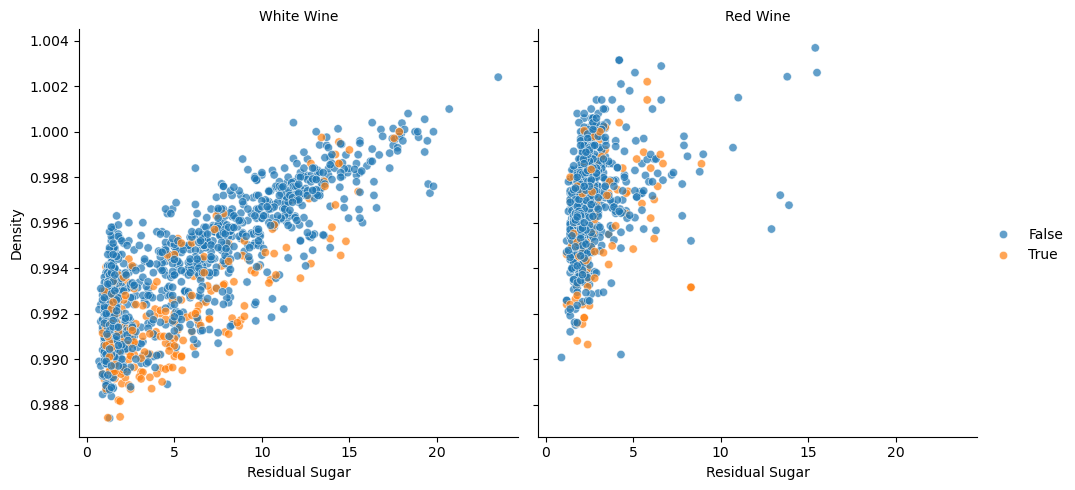

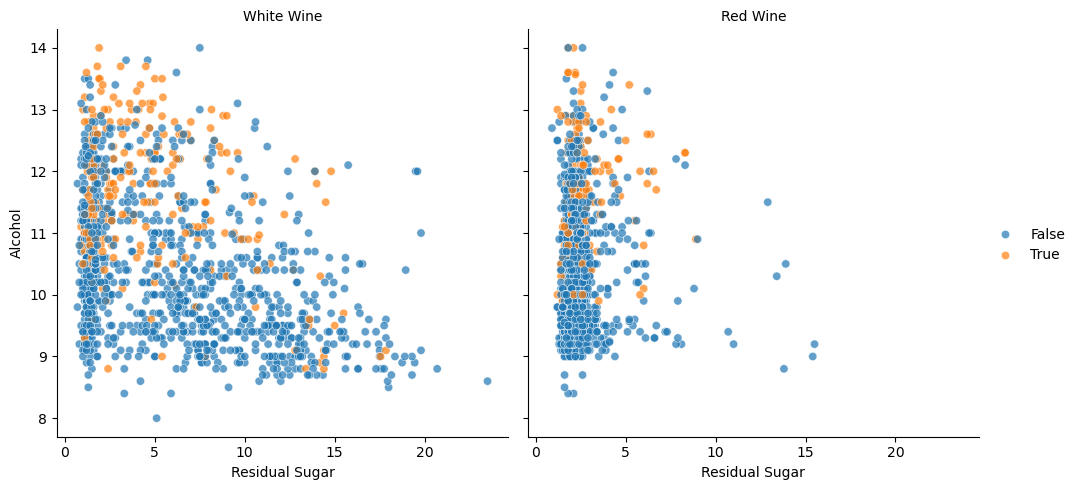

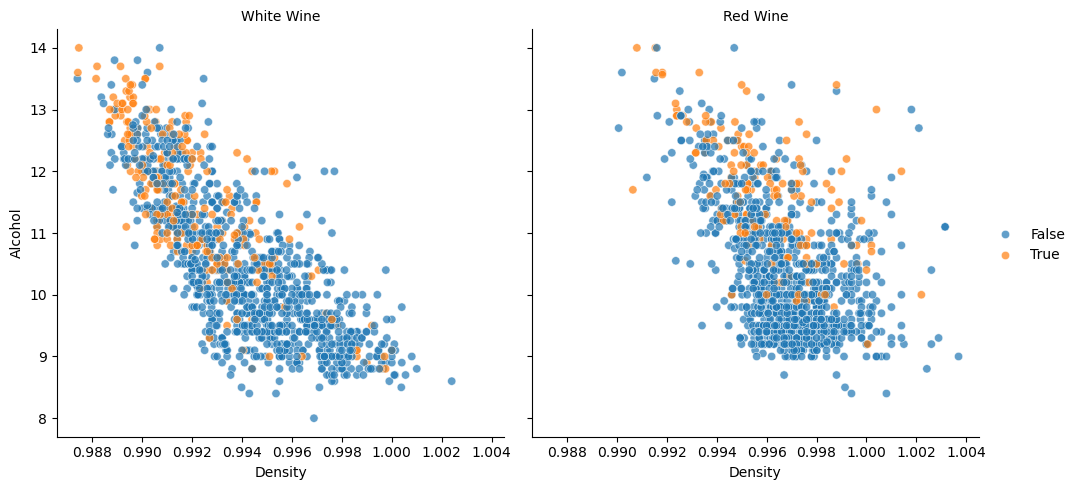

In [90]:
## trying to a build a fucntion that looks at different combinations for red and white wine separately

correlation_variables = ['fixed acidity', 'residual sugar', 'density', 'alcohol']

def plot_facet_grid(data, x_var, y_var):
    fig2 = sns.FacetGrid(data, col="type", height=5, aspect=1)
    fig2.map_dataframe(sns.scatterplot, x=x_var, y=y_var, hue="great wine", alpha=0.7)
    fig2.set_axis_labels(x_var.replace("_", " ").title(), y_var.replace("_", " ").title())
    fig2.set_titles("{col_name} Wine")
    fig2.add_legend()

    plt.show()

for i in range(len(correlation_variables)):
    for j in range(i + 1, len(correlation_variables)):
        x_var = correlation_variables[i]
        y_var = correlation_variables[j]
        plot_facet_grid(wines, x_var, y_var)

The correlation between the binary variable great wine and the other variables also changes from red to white wines. To focus on this correlation, the figure below provides a graphical representation of the correlation coefficients using the point-biserial correlation coefficient, which is particularly suited when one of the variables is binary. 

In [69]:
pointbi_red2 = red_wines[numeric_values].corrwith(red_wines["great wine"], method=stats.pointbiserialr).transpose().reset_index()
pointbi_red2.columns = ["Variable","Coefficient of Correlation (in %)", "P-value"]
pointbi_red2["Type"] = "Red"


pointbi_white2 = white_wines[numeric_values].corrwith(white_wines["great wine"], method=stats.pointbiserialr).transpose().reset_index()
pointbi_white2.columns = ["Variable","Coefficient of Correlation (in %)", "P-value"]
pointbi_white2["Type"] = "White"

pointbi_final = pd.concat([pointbi_red2, pointbi_white2])

pointbi_final["Coefficient of Correlation (in %)"] = (pointbi_final["Coefficient of Correlation (in %)"]*100).round(0)
pointbi_final["P-value"] = (pointbi_final["P-value"]).round(2)

point_bi_fig = px.bar(pointbi_final, x="Variable", y="Coefficient of Correlation (in %)", color="Type", barmode="group",
                      title="Figure 10 - Coefficient of correlation with Great Wine binary variable (using point biserial correlation coefficient)",
                      text="Coefficient of Correlation (in %)",
                      hover_name="Type",
                      hover_data={"Type" : False, "Coefficient of Correlation (in %)": True, "Variable": True, "P-value" : True}, 
                      color_discrete_map={"Red": "rgb(123,3,35)", "White": "rgb(238, 237, 196)"},
                      template = "none",
                      height = 540
                     )
point_bi_fig.update_xaxes(categoryorder='total descending')

point_bi_fig.show()

# point_bi_fig.write_image("Exported Graphs Library/Coefficient of correlation with Great Wine binary variable (using point biserial correlation coefficient).png",scale = 12)

We observe a strong positive correlation between alcohol and wine quality for both red and white wines. Sulphates and citric acid also show a positive correlation with the binary variable "great wine," though at a more modest level for white wines.

Additionally, there are negative correlations with :

- density,
- total SO₂,
- volatile acidity,
- and chloride
sSome of these findings align with the literature. According to Chaillet (2022) and Agrovin.com (2021), low levels of volatile acidity are essential for maintaining wine quality. Coli et al. (2015) also remind their readers that high chloride levels affect wine's taste both directly, by making the wine saltier and, indirectly because high concentrations of chloride in soil can hinder water absorption by plants.

Interestingly, the correlations between "great wine" and variables like pH, residual sugar, fixed acidity, and citric acid differ in sign between wine types.

These different results, however, should be interpreted with caution. Firstly, correlation is not evidence of causality. This is especially relevant here, where some of the aforementioned variables are strongly correlated with each other, meaning that their correlation with "great wine" may arise indirectly due to a shared correlation with another variale.
le.

## Explanatory Analysis - Characteristics of a “great wine”

“Correlation is not causality”. This quote was heard in many econometrics’ classes around the globe. In order to identify the main characteristics of a "great wine" (its significant explanatory variables), we use probit regressions with “great wine” as a binary “explained variable”. Because of the observations that we made during the previous part, we choose to treat red and white wines as two different populations and conduct for each wine a probit model. Some variables were not included in the regression because of their strong collinearity with other variables would have violated classical econometric assumptions and give a spurious correlation between. Total sulfur dioxid was for example dropped because it is a function of total sulfur dioxid and bound sulfur dioxid. Similarly, fixed acidity was also drop for being a function of volatile acidity. The results of the regression for the red wines' subsample appear in the table below.

In [70]:
# Inspiration for the code : https://medium.com/@polanitzer/the-probit-model-in-python-predict-default-among-u-s-corporates-c0f32cb4b5c2
Y = red_wines["great wine"]
X = red_wines.drop(["great wine", "total sulfur dioxide", "fixed acidity"], axis=1) 
#total sulfur dioxid is drop because it is a function of total sulfur dioxid and bound sulfur dioxid. Keeping it would have violated classical econometric assumptions and give a spurious correlation between its free component and the explained variable.
#fixed acidity was also drop for also being a function of volatile acidity
X = sm.add_constant(X)
model = sm.Probit(Y, X)
probit_model = model.fit()
probit_model.summary()

Optimization terminated successfully.
         Current function value: 0.265610
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:             great wine   No. Observations:                 1250
Model:                         Probit   Df Residuals:                     1240
Method:                           MLE   Df Model:                            9
Date:                Fri, 08 Nov 2024   Pseudo R-squ.:                  0.3166
Time:                        19:24:55   Log-Likelihood:                -332.01
converged:                       True   LL-Null:                       -485.83
Covariance Type:            nonrobust   LLR p-value:                 6.279e-61
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.0375     42.357     -0.024      0.980     -84.056      81.981
volatile acidity       -1.7939      0.478     -3.751      0.000      -2.731      -0.857
citric acid             0.0352      0.499      0.071      0.944      -0.942       1.013
residual sugar          0.0570      0.041      1.382      0.167      -0.024       0.138
chlorides              -3.3730      1.598     -2.111      0.035      -6.505      -0.241
free sulfur dioxide    -0.0117      0.006     -2.085      0.037      -0.023      -0.001
density                -3.8491     42.247     -0.091      0.927     -86.651      78.953
pH                     -0.8229      0.461     -1.784      0.075      -1.727       0.081
sulphates               1.7612      0.329      5.348      0.000       1.116       2.407
alcohol                 0.5897      0.071      8.289      0.000       0.450       0.729
=======================================================================================
"""

The results for the white wines' subsample are described in the following table.

In [71]:
Y2 = white_wines["great wine"]
X2 = white_wines.drop(["great wine", "total sulfur dioxide", "fixed acidity"], axis=1) #total sulfur dioxid is drop because it is a function of total sulfur dioxid and bound sulfur dioxid. Keeping it would have violated classical econometric assumptions and give a spurious correlation between its free component and the explained variable.
X2 = sm.add_constant(X2)
model2 = sm.Probit(Y2, X2)
probit_model2 = model2.fit()
probit_model2.summary()

Optimization terminated successfully.
         Current function value: 0.406316
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:             great wine   No. Observations:                 1250
Model:                         Probit   Df Residuals:                     1240
Method:                           MLE   Df Model:                            9
Date:                Fri, 08 Nov 2024   Pseudo R-squ.:                  0.2053
Time:                        19:24:55   Log-Likelihood:                -507.90
converged:                       True   LL-Null:                       -639.12
Covariance Type:            nonrobust   LLR p-value:                 2.342e-51
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 257.4831     63.442      4.059      0.000     133.138     381.828
volatile acidity       -2.2886      0.530     -4.319      0.000      -3.327      -1.250
citric acid             0.3444      0.435      0.792      0.428      -0.508       1.197
residual sugar          0.1130      0.026      4.370      0.000       0.062       0.164
chlorides              -1.1094      3.349     -0.331      0.740      -7.674       5.455
free sulfur dioxide     0.0033      0.003      1.265      0.206      -0.002       0.008
density              -267.8463     63.582     -4.213      0.000    -392.465    -143.227
pH                      1.5315      0.321      4.777      0.000       0.903       2.160
sulphates               0.8111      0.396      2.047      0.041       0.035       1.588
alcohol                 0.2072      0.091      2.277      0.023       0.029       0.386
=======================================================================================
"""

For our two types of wine, citric acid increases the probability of a wine being considered a "great wine."
Most of the variables are statistically significant for both samples. For both model, the probability of having a "great wine":
 increases with citric acid, alcohol and sulphates,
- ,
- decreases with volatile aciditInterestingly, some explanatory variables have different impacts in our two subpopulations on their probability of being a "great wine". Density plays for example a negative role in the quality of white wines. However, if its coefficient is also negative for red wines, it is not statistically significant. Similarly, residual sugar play a (positive) role in the quality of white wines but none for red wines. In parallel, the coefficients for free SO₂ and chloride are significantly negative for red wines. Finally, pH has a completely inverse correlation between the two types of wine. While it has a negative coefficient for red wine, the opposite is true for white wine, where it plays a positive role in quality. In an article on masterclass.com (2021), it is explained that because of its lack of tannins, acidity (excluding volatile acidity) has a pivotal role in white wines' quality. It is possible that the pH measures capture part of this relationship.

Several limitations mark these models. The first one concerns the fact that we study each explanatory variable individually. However, the impact of a wine’s characteristics on its quality depends not on a single variable but on the complex interactions between several features. It can then be argued that because these interactions were not taken into account, the model can hardly describe the true inherent effect of the explanatory variables on the probability of having a "great wine". However, our lack of expertise in oenology disenables us to be sure of the coherence in the choice and the interpretation of potential interaction term. A second point is that we considered white and red wines as two distinct homogeneous entities. However, different subtypes of wine exist in each category. It is arguable that the relationship between our explained and explanatory variables changes potentially from one subtype to another. A great Chardonay has maybe different rules for its quality than a Gewürztraminer. A final remark concerns the absence of some key data. Tannins notably play an important role in the taste of red wines and could have been an interesting addition to this model.
del.

## Machine Learning Model
The motivation of codes and parameters understanding are taken from our Machine Learning course with Fabrice Rossi

In [72]:
## split data to create sepaarte data sets
red_wine = wines[wines["type"] == "Red"].drop("type", axis = 1)
white_wine = wines[wines["type"] == "White"].drop("type", axis = 1)

In [73]:
## cleaning the variables
## making sure that the 'great wine' variable is considered as a numerical variable for a binary classification
red_wine['great wine'] = red_wine['great wine'].astype("float")
white_wine['great wine'] = white_wine['great wine'].astype("float")

## a list of numerical variables to consider as inputs
numerical_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                     'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                     'pH', 'sulphates', 'alcohol']

In [74]:
## necessary packages for our Decision Tree, Optimised Decision Tree and Random Forests 

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay

In [75]:
## input and output variable
X_red = red_wine[numerical_columns] ## input
y_red = red_wine['great wine'] ## output or target

X_white = white_wine[numerical_columns] ## input
y_white = white_wine['great wine'] ## output or targe

## data split
X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(X_red, y_red, test_size=0.2, random_state=42)
X_white_train, X_white_test, y_white_train, y_white_test = train_test_split(X_white, y_white, test_size=0.2, random_state=42)

Classification Report for Red Wine:
               precision    recall  f1-score   support

         0.0       0.86      0.82      0.84       209
         1.0       0.27      0.34      0.30        41

    accuracy                           0.74       250
   macro avg       0.57      0.58      0.57       250
weighted avg       0.77      0.74      0.75       250

Accuracy Score for Red Wine: 0.744
Classification Report for White Wine:
               precision    recall  f1-score   support

         0.0       0.86      0.87      0.86       196
         1.0       0.50      0.48      0.49        54

    accuracy                           0.78       250
   macro avg       0.68      0.67      0.68       250
weighted avg       0.78      0.78      0.78       250

Accuracy Score for White Wine: 0.784


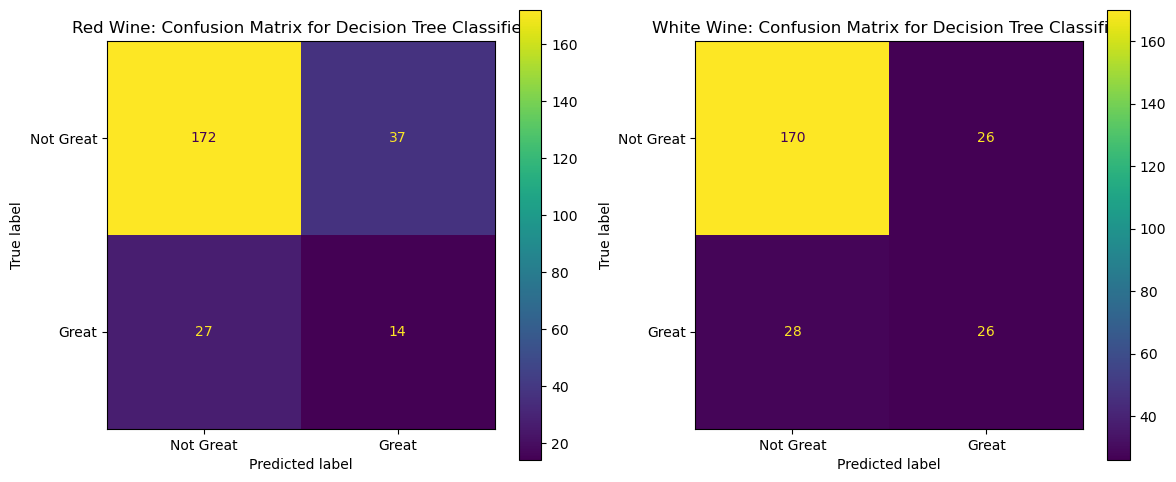

In [76]:

# Simple Decision Tree Classifier (without parameters specification)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_red_train, y_red_train)
model.fit(X_white_train, y_white_train)

# predictions on test set
y_red_pred = model.predict(X_red_test)
y_white_pred = model.predict(X_white_test)

# model evaluation
print("Classification Report for Red Wine:\n", classification_report(y_red_test, y_red_pred))
print("Accuracy Score for Red Wine:", accuracy_score(y_red_test, y_red_pred))

print("Classification Report for White Wine:\n", classification_report(y_white_test, y_white_pred))
print("Accuracy Score for White Wine:", accuracy_score(y_white_test, y_white_pred))

target_names = ['Not Great', 'Great']
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Red Wine Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_red_test, y_red_pred, ax=axes[0])
axes[0].xaxis.set_ticklabels(target_names)
axes[0].yaxis.set_ticklabels(target_names)
axes[0].set_title("Red Wine: Confusion Matrix for Decision Tree Classifier")

# White Wine Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_white_test, y_white_pred, ax=axes[1])
axes[1].xaxis.set_ticklabels(target_names)
axes[1].yaxis.set_ticklabels(target_names)
axes[1].set_title("White Wine: Confusion Matrix for Decision Tree Classifier")

# Display the plot
plt.tight_layout()
plt.show()


In [77]:
## parameters speicifcation of the decision tree model
## we use the understanding from our Machine Learning course and play with some numbers. For example, cv_folds = 5 because we think the data is not that big
param_grid = {'max_depth': range(1, 20),
'min_samples_split': [2, 10, 25, 50, 75, 85, 100, 200]}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)

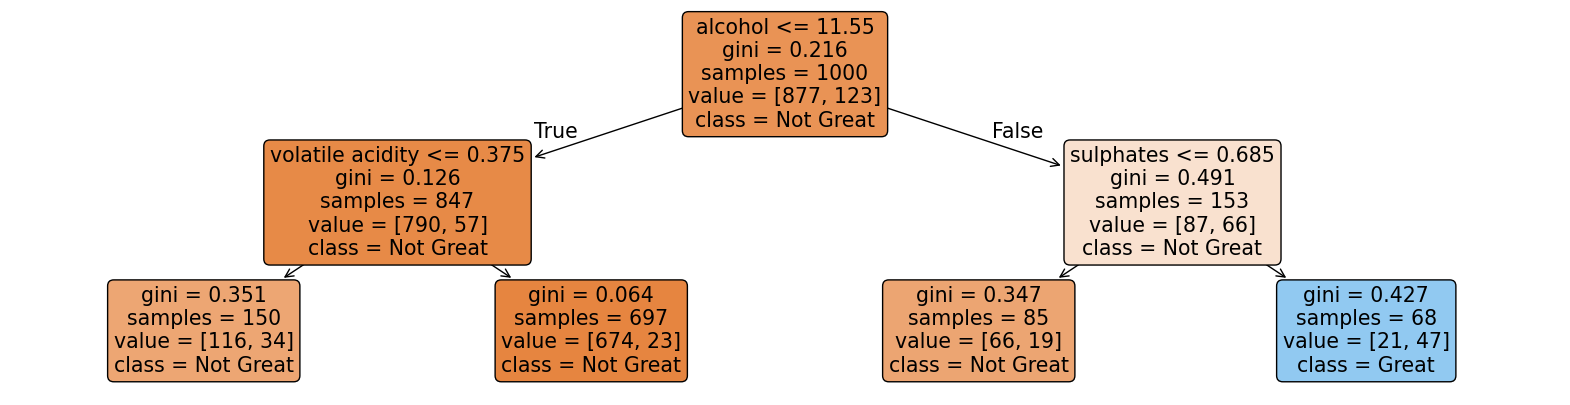

In [78]:
# Decision Tree Classifier with GridSearch for optimal parameters
grid_search.fit(X_red_train, y_red_train)

# training model on the train set
best_model_red = grid_search.best_estimator_
best_model_red.fit(X_red_train, y_red_train)

# Predictions and evaluation
y_red_pred = best_model_red.predict(X_red_test)

# Optional: Plot the decision tree (for smaller trees)
# https://scikit-learn.org/1.5/auto_examples/tree/plot_iris_dtc.html#sphx-glr-auto-examples-tree-plot-iris-dtc-py
plt.figure(figsize=(20, 5))
plot_tree(best_model_red, feature_names=numerical_columns, class_names=['Not Great', 'Great'], filled=True, rounded=True)
plt.savefig("Exported Graphs Library/decision_tree_red_wine.png")
plt.show()

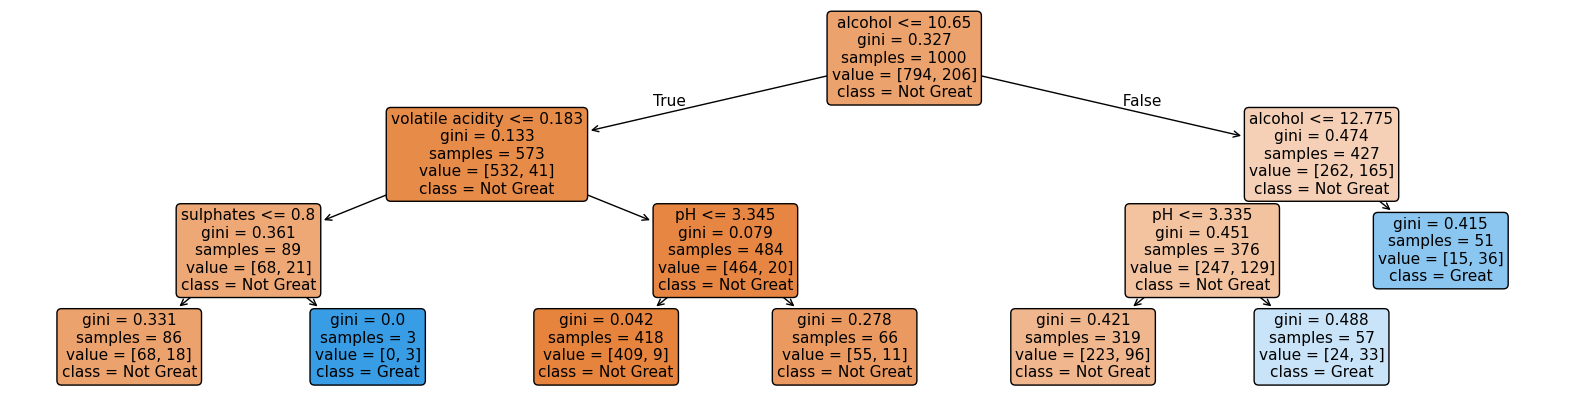

In [79]:
# Initialize Decision Tree Classifier with GridSearch for optimal parameters
grid_search.fit(X_white_train, y_white_train)

# training model on the train set
best_model_white = grid_search.best_estimator_
best_model_white.fit(X_white_train, y_white_train)

# Predictions and evaluation
y_white_pred = best_model_white.predict(X_white_test)

# Optional: Plot the decision tree (for smaller trees)
# https://scikit-learn.org/1.5/auto_examples/tree/plot_iris_dtc.html#sphx-glr-auto-examples-tree-plot-iris-dtc-py
plt.figure(figsize=(20, 5))
plot_tree(best_model_white, feature_names=numerical_columns, class_names=['Not Great', 'Great'], filled=True, rounded=True)
plt.savefig("Exported Graphs Library/decision_tree_white_wine.png")
plt.show()

In [80]:
# https://scikit-learn.org/1.5/modules/cross_validation.html
cv_scores_red = cross_val_score(best_model_red, X_red, y_red, cv=5)
cv_scores_white = cross_val_score(best_model_white, X_white, y_white, cv=5)

# Create a DataFrame with the cross-validation scores for red and white wines
cv_table = pd.DataFrame({
    'Wine Type': ['Red', 'White'],
    'Cross-Validation Result': [
        "%0.2f accuracy with a standard deviation of %0.2f" % (cv_scores_red.mean(), cv_scores_red.std()),
        "%0.2f accuracy with a standard deviation of %0.2f" % (cv_scores_white.mean(), cv_scores_white.std())
    ]
})

cv_table.to_csv("Exported Graphs Library/cv_table.csv")

In [81]:
## random forest model
rf_model_red = RandomForestClassifier(random_state=42)
rf_model_red.fit(X_red_train, y_red_train)

# predictions
y_red_pred_rf = rf_model_red.predict(X_red_test)

# Evaluate the model
print("Red: Random Forest Classifier - Classification Report:\n", classification_report(y_red_test, y_red_pred_rf))

Red: Random Forest Classifier - Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.94      0.91       209
         1.0       0.52      0.32      0.39        41

    accuracy                           0.84       250
   macro avg       0.70      0.63      0.65       250
weighted avg       0.82      0.84      0.82       250



In [82]:
## random forest model
rf_model_white = RandomForestClassifier(random_state=42)
rf_model_white.fit(X_white_train, y_white_train)

# predictions
y_white_pred_rf = rf_model_white.predict(X_white_test)

# Evaluate the model
print("White: Random Forest Classifier - Classification Report:\n", classification_report(y_white_test, y_white_pred_rf))


White: Random Forest Classifier - Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.93      0.88       196
         1.0       0.57      0.31      0.40        54

    accuracy                           0.80       250
   macro avg       0.70      0.62      0.64       250
weighted avg       0.77      0.80      0.78       250



In [83]:
## variables importance
feature_importances_red = pd.Series(rf_model_red.feature_importances_, index=numerical_columns).sort_values(ascending=False)
feature_importances_white = pd.Series(rf_model_white.feature_importances_, index=numerical_columns).sort_values(ascending=False)

# Combine into a DataFrame with a common feature column
feature_importances_df = pd.concat([feature_importances_red, feature_importances_white], axis=1)
feature_importances_df.columns = ['feature_importances_red', 'feature_importances_white']
feature_importances_df = feature_importances_df.reset_index()
feature_importances_df.rename(columns={'index': 'Feature'}, inplace=True)

# Display the combined DataFrame
print("Feature Importances from Random Forest:\n", feature_importances_df)

Feature Importances from Random Forest:
                  Feature  feature_importances_red  feature_importances_white
0                alcohol                 0.199843                   0.154570
1              sulphates                 0.118907                   0.080701
2       volatile acidity                 0.112384                   0.072183
3                density                 0.090008                   0.133726
4   total sulfur dioxide                 0.079204                   0.089115
5          fixed acidity                 0.074919                   0.064653
6            citric acid                 0.071906                   0.067774
7              chlorides                 0.067552                   0.083130
8         residual sugar                 0.067382                   0.082454
9                     pH                 0.063023                   0.093310
10   free sulfur dioxide                 0.054872                   0.078384


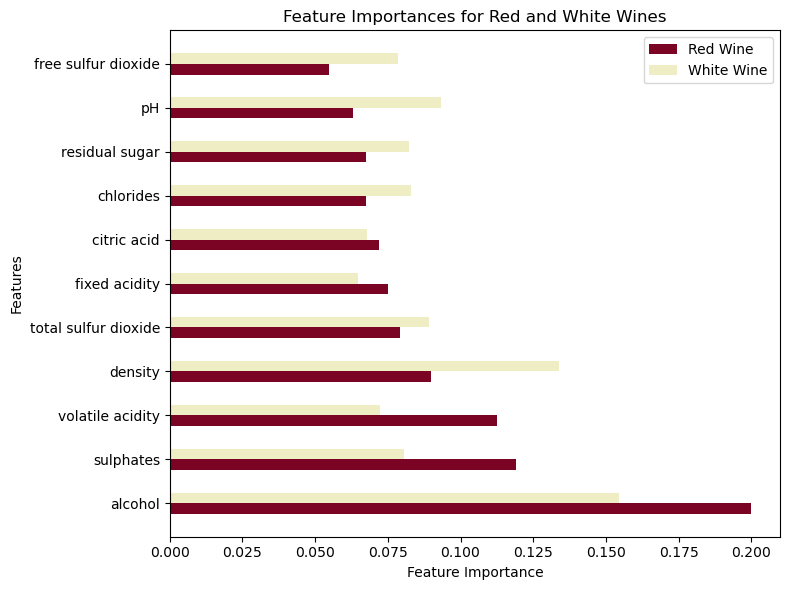

In [84]:
# Figure dimension
plt.figure(figsize=(8, 6))

# bar size and spacing adjustments
bar_size = 0.35  # bar height
padding = 0.75  # spacing between bars
y_locs = np.arange(len(feature_importances_df['Feature'])) * (2 * bar_size + padding)

# plot feature importances for red and white wine
plt.barh(y_locs - bar_size / 2, feature_importances_df['feature_importances_red'], height=bar_size, label='Red Wine', color="#7b0323")
plt.barh(y_locs + bar_size / 2, feature_importances_df['feature_importances_white'], height=bar_size, label='White Wine', color="#eeedc4")

# labels and title
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances for Red and White Wines')
plt.yticks(y_locs, feature_importances_df['Feature'], fontsize=10)
plt.legend()

# Display the plot
plt.tight_layout()
plt.savefig("Exported Graphs Library/feature_importances_for_wine.png", dpi=300)